In [22]:
%matplotlib inline

In [23]:
import numpy as np

In [24]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
# Cost function
def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    cost = -1/m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

In [26]:
def gradient(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    grad = 1/m * (X.T @ (h - y))
    return grad

In [27]:
epochs = 100
# Gradient descent function
def gradient_descent(X, y, w, alpha):
    for epoch in range(epochs):
        grad = gradient(X, y, w)
        w -= alpha * grad
        if epoch % 10 == 0:  # Print cost every 10 epochs
            cost = compute_cost(X, y, w)
            print(f'Epoch {epoch}, Cost: {cost}')
    return w

In [28]:
import pandas as pd
# Load dataset
df = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/synthetic_logistic_dataset.csv')
df.head()

,Feature1,Feature2,Label
0,-0.372929,0.513042,1
1,1.812935,3.270534,1
2,2.840428,2.920996,1
3,2.794548,0.095620,1
4,1.444105,0.977241,1


In [29]:
from sklearn.model_selection import train_test_split
# Split dataset into features and target variable
X = df.drop(columns=['Label']).values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
y_train = y_train.reshape(-1, 1)  # Reshape y to be a column vector
# Initialize weights
w = np.zeros((X_train.shape[1], 1))
# Set learning rate
alpha = 0.01
# Perform gradient descent
w = gradient_descent(X_train, y_train, w, alpha)
print('Final weights:', w)
# Evaluate on test set
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
y_test = y_test.reshape(-1, 1)  # Reshape y to be a column vector
def predict(X, w):
    return (sigmoid(X @ w) >= 0.5).astype(int)
# Make predictions
predictions = predict(X_test, w)
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Save the model weights

Epoch 0, Cost: [[0.68743916]]
Epoch 10, Cost: [[0.635586]]
Epoch 20, Cost: [[0.59203027]]
Epoch 30, Cost: [[0.55524304]]
Epoch 40, Cost: [[0.52395722]]
Epoch 50, Cost: [[0.49714845]]
Epoch 60, Cost: [[0.47399886]]
Epoch 70, Cost: [[0.45385832]]
Epoch 80, Cost: [[0.43620975]]
Epoch 90, Cost: [[0.42064036]]
Final weights: [[ 0.0070565 ]
 [ 0.52224167]
 [-0.01289001]]
Accuracy: 97.50%


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, w):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', edgecolors='k', s=50)
    
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    print(xx.shape, yy.shape)
    # Predict on the grid
    Z = predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()
    print(f'Weights: {w}')

(100, 100) (100, 100)


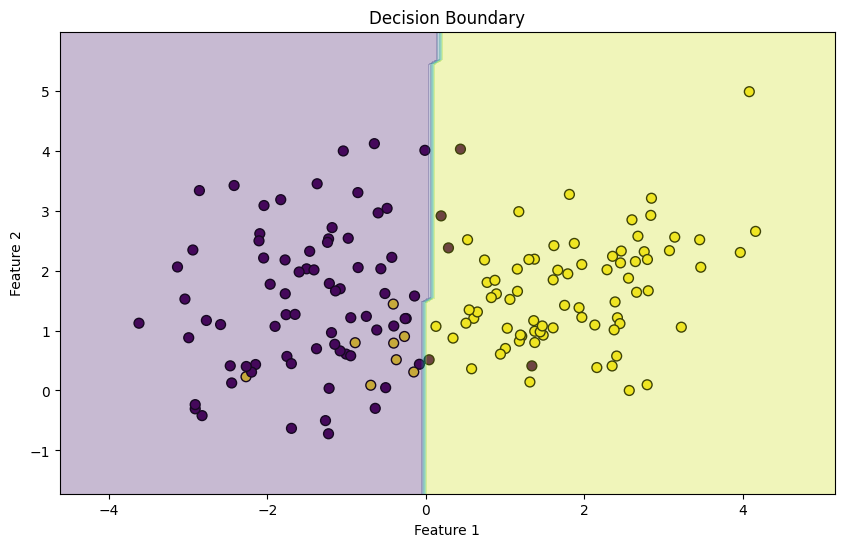

Weights: [[ 0.0070565 ]
 [ 0.52224167]
 [-0.01289001]]


In [36]:
plot_decision_boundary(X_train, y_train, w)